<a href="https://colab.research.google.com/github/richieb21/ignition-hacks/blob/main/predict_EEGvoltage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


In [7]:
#source data from Kaggle(required to download from the website)
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! kaggle datasets download metacosmos/eeg-dataset-recorded-in-a-car-simulator

 59% 9.00M/15.4M [00:00<00:00, 16.4MB/s]
100% 15.4M/15.4M [00:00<00:00, 24.9MB/s]


In [9]:
!cd /content/y
! unzip eeg-dataset-recorded-in-a-car-simulator.zip

/bin/bash: line 0: cd: /content/y: No such file or directory
Archive:  eeg-dataset-recorded-in-a-car-simulator.zip
replace X_item_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: X_item_10.csv           
  inflating: X_item_11.csv           
  inflating: X_item_12.csv           
  inflating: X_item_13.csv           
  inflating: X_item_14.csv           
  inflating: X_item_15.csv           
  inflating: X_item_16.csv           
  inflating: X_item_17.csv           
  inflating: X_item_18.csv           
  inflating: X_item_19.csv           
  inflating: X_item_2.csv            
  inflating: X_item_20.csv           
  inflating: X_item_21.csv           
  inflating: X_item_22.csv           
  inflating: X_item_23.csv           
  inflating: X_item_24.csv           
  inflating: X_item_25.csv           
  inflating: X_item_3.csv            
  inflating: X_item_4.csv            
  inflating: X_item_5.csv            
  inflating: X_item_6.csv            
  inflating: X_item_7.csv

In [10]:
#print pandas dataframe
data=pd.read_csv('X_item_1.csv')
#print(type(data))
split=data['-12;-1.5516247;0.53307754;1.4710278;-6.8242185;0.872886;1.7482582;5.843572;3.1885856;-1.5489088;-4.2587052;1.2039108;-3.3919887;2.3924825;3.3319984;-1.5195659;5.9143993;-2.1218342;0.93425862;3.5526886;-0.49939592;0.2716543;-4.8271452;-1.8079899;2.0471965;-0.41194134;-5.4100341;0.76464844;-3.4659315;3.8028669;2.1644446;4.2061085;-4.7557182;1.0973469;0.048977121;-3.6234864;0.37750677'].str.split(';', expand=True)

In [11]:
print(split.shape)
#print(type(split))
display(split)

(3584, 37)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-11.996094,-0.37981993,-2.4686714,-1.4378128,-5.533218,2.8845897,1.4831695,6.0354658,3.5883848,-1.2651828,...,0.15693746,-5.8472038,4.9545735,0.27820565,2.260582,-4.1915368,5.122525,-1.8972359,-1.4070185,2.4069895
1,-11.992188,-1.8724234,-2.2248338,-0.62156572,-7.602066,2.5981191,1.9927833,6.3016282,2.9636424,0.17722822,...,-0.80631511,-5.2495321,1.4857872,2.5378839,3.9878358,-3.7126736,2.745664,-1.9540249,-1.4093056,0.47260052
2,-11.988281,-2.318725,-1.6552036,-2.2850079,-7.6316574,0.6701031,0.47694528,4.5069684,3.0154375,1.4328118,...,-0.81927297,-4.4308775,4.972795,0.62427646,5.2904179,-3.1724291,3.9104918,-0.45158608,-0.9223882,-0.70902738
3,-11.984375,-2.1232055,-1.280379,-1.4437043,-7.5675846,1.4342875,-2.4651829,1.9885172,2.8751667,1.6424257,...,-0.42566617,-5.4006773,1.8271864,-1.0178867,4.1911818,-4.9355194,0.96782468,-0.42568902,2.4011017,1.7078276
4,-11.980469,-4.3297492,-2.8027034,0.64776578,-7.2071571,2.0364447,-0.96469529,4.1964937,0.46604243,1.1680236,...,-0.4190482,-4.5210521,2.3472695,0.55587556,3.7196402,-4.8551328,1.1881267,-1.4641091,-1.0618057,1.0482338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,1.984375,2.7251323,-0.074845262,1.1004765,2.2191242,-2.2707536,0.16944515,-3.7497428,-2.299173,-1.3261056,...,-1.5118575,-5.3002877,2.9244848,-5.5032233,2.1037249,3.1650847,-4.9068473,-2.1445025,-4.2268832,-4.3276844
3580,1.9882812,1.8496391,-0.72519835,1.2612988,0.64725258,-4.1817313,1.1932378,-1.1915757,-1.24665,-1.9965323,...,-0.13992355,-3.6532834,3.9952918,-2.658779,1.3207718,1.0549925,-0.8905922,-3.7137776,-3.9302921,-5.5810517
3581,1.9921875,2.8369935,0.19590099,-0.62762993,1.1802915,-3.875983,-1.3127129,-5.9526659,-0.82818868,-1.234974,...,-1.9543843,-3.4340788,4.5253091,-3.8042232,0.87122169,2.1276542,-1.0878261,-3.4126979,-5.2742023,-2.9049305
3582,1.9960938,0.77423166,-0.6970486,-0.014073133,3.2653343,-3.6934561,-4.8506686,-3.4171161,-3.2603738,-1.7959692,...,-1.5383506,-7.262521,1.8292162,-2.5396633,1.8176536,2.1370452,-3.7406294,-3.9695745,-4.7542038,-3.8005817


In [13]:
#user defined function to convert Pandas dataframes to float lists
def convert(pandas_df):
  list = pandas_df.tolist()
  float_lst = []
  for item in list:
    float_lst.append(float(item))
  return(float_lst)

Text(0.5, 1.0, 'EEG Signal from distracted driving')

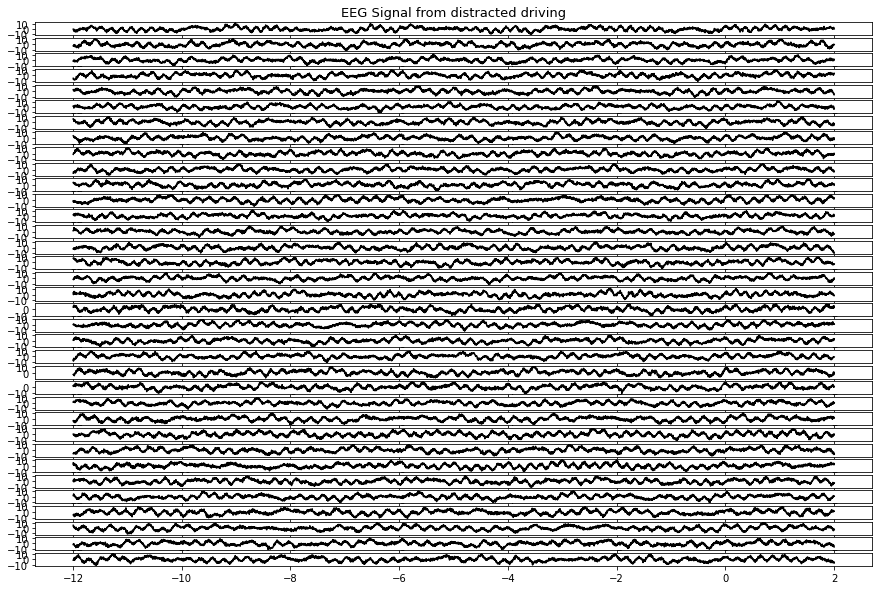

In [14]:
#data visualization(voltage signal vs time)
times = split.iloc[:, 0]
times_converted=convert(times)

figure, axis = plt.subplots(35, 1, figsize=(15,10))
lis=[]

#do not split first column with times
for i in range(1,36):
  var=split.iloc[:, i]
  lis.append(var)

for i in range(len(lis)):
  axis[i].plot(times_converted,convert(lis[i]), 'k')
axis[0].set_title('EEG Signal from distracted driving', {'fontsize':13})

In [15]:
second=split.iloc[:, 2]
third = split.iloc[:, 3]
training=convert(second)
testing=convert(third)

In [16]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of the pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check exceeds length
		if out_end_ix > len(sequence):
			break
		# combine parts of pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [20]:
# define input sequence
raw_seq = training
# choose a number of time steps to predict
n_steps_in, n_steps_out = 50, 400
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [21]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 400)               40400     
                                                                 
Total params: 161,600
Trainable params: 161,600
Non-trainable params: 0
_________________________________________________________________


In [23]:
#use mean square error loss to optimize parameters
model.compile(optimizer='adam', loss='mse')

In [24]:
model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
98/98 [==============================] - 20s 161ms/step - loss: 11.0062
Epoch 2/20
98/98 [==============================] - 16s 164ms/step - loss: 24.3272
Epoch 3/20
98/98 [==============================] - 17s 174ms/step - loss: 11.2251
Epoch 4/20
98/98 [==============================] - 17s 177ms/step - loss: 11.1458
Epoch 5/20
98/98 [==============================] - 16s 162ms/step - loss: 11.0927
Epoch 6/20
98/98 [==============================] - 16s 163ms/step - loss: 10.9300
Epoch 7/20
98/98 [==============================] - 16s 161ms/step - loss: 69.7528
Epoch 8/20
98/98 [==============================] - 16s 166ms/step - loss: 10.5696
Epoch 9/20
98/98 [==============================] - 16s 165ms/step - loss: 10.1306
Epoch 10/20
98/98 [==============================] - 16s 165ms/step - loss: 34.4025
Epoch 11/20
98/98 [==============================] - 17s 177ms/step - loss: 723831936.0000
Epoch 12/20
98/98 [==============================] - 16s 162ms/step - loss: 19

In [25]:
# predicted terms
x_input = np.array(testing)[0:n_steps_in]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 3.5463281e+00  4.2344117e+00  4.2753181e+00  3.2362720e-01
   3.3053136e+00  2.0897763e+00  1.2935191e+00 -3.9971991e+00
  -1.3078982e+00 -2.0877540e+00 -1.2489893e+00 -3.6284230e+00
   2.7807515e+00  1.6937469e+00 -3.1698306e+00 -3.2380710e+00
  -1.0838385e+00  2.8481531e+00 -7.9522109e-01 -1.4548820e+00
  -2.4981792e+00 -2.5906129e+00 -8.5050464e-02  1.5043939e+00
   4.2939754e+00  3.5404537e+00  2.8877339e+00  2.5035524e+00
   9.6565038e-01  3.1195686e+00  1.5767540e+00  2.2660456e+00
   2.2979691e+00  1.1386781e+00  4.7325134e-01  5.1270800e+00
   2.7350605e+00  6.1972523e-01 -5.3237921e-01  2.1404881e+00
   2.3498528e-01 -1.4885067e+00  5.1334077e-01 -1.7276380e+00
   3.9215207e-01 -2.0750172e+00 -2.2434118e+00 -3.4936192e+00
  -2.0583217e+00 -1.0311402e+00 -2.8697172e-01 -3.8617772e-01
  -4.0963097e+00 -2.7551608e+00 -4.9658203e+00 -6.0510864e+00
  -3.3010323e+00 -5.2880812e+00 -5.5032105e+00 -1.4928470e+00
  -3.3333557e+00 -2.4504275e+00 -1.0522470e+00 -3.1544375e+00
  -4.661

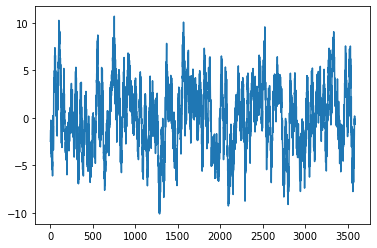

In [26]:
yhat_list = yhat.tolist()
sub=yhat_list[0]

float_list=[]
for i in range(len(sub)):
  float_list.append(sub[i])

plt.plot(training)

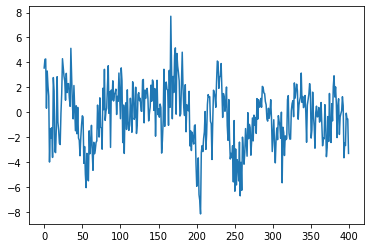

In [27]:
#print predictions
plt.plot(float_list)